In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from cv2.ximgproc import guidedFilter

In [2]:
def mean(x, r):
    return cv2.boxFilter(x, cv2.CV_64F, (r, r))


def Guidedfilter(im, p, r, eps):
    '''
    im: guide
    p: input
    r: size of kernel
    eps: regulation parameter
    '''
    mean_I = mean(im, r)
    mean_p = mean(p, r)
    mean_Ip = mean(im * p, r)
    cov_Ip = mean_Ip - mean_I * mean_p; # cov(x, y) = E(xy) - E(x)E(y)

    mean_II = mean(im * im, r)
    var_I = mean_II - mean_I * mean_I # var(x) = cov(x, x)

    # linear coeffs
    a = cov_Ip / (var_I + eps)
    b = mean_p - a * mean_I

    mean_a = mean(a, r)
    mean_b = mean(b, r)

    q = mean_a * im + mean_b
    return q


def compare(a, b):
    plt.figure(figsize = (15, 15))
    plt.subplot(1, 2, 1)
    plt.imshow(a)
    plt.subplot(1, 2, 2)
    plt.imshow(b)
    plt.show()

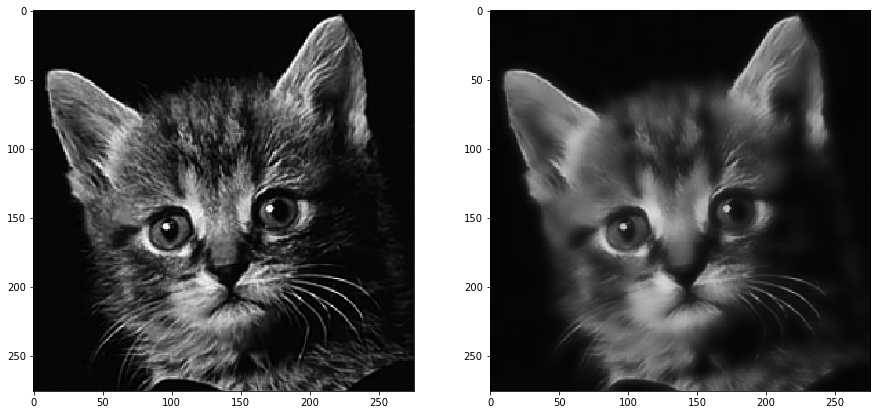

In [3]:
I = cv2.imread("../data/cat.png")
I_normed = I / 255
I_normed = np.float32(I_normed) # else it is float64 and opencv doesn't accept it

filtered = Guidedfilter(I_normed, I_normed, 8, 0.2 ** 2)
# %timeit filtered = Guidedfilter(I_normed, I_normed, 8, 0.2 ** 2)

compare(I, filtered)

In [4]:
def fastGuidedfilter(im, p, r, eps, s): # s: ratio of resizing
    size = im.shape
    new_shape = (int(size[1] / s), int(size[0] / s))

    I_sub = cv2.resize(im, new_shape, interpolation = cv2.INTER_AREA)
    p_sub = cv2.resize(p, new_shape, interpolation = cv2.INTER_AREA)
    # r_sub = r / s
    
    mean_I = mean(I_sub, r)
    mean_p = mean(p_sub, r)
    mean_Ip = mean(I_sub * p_sub, r)
    cov_Ip = mean_Ip - mean_I * mean_p
    
    mean_II = mean(I_sub * I_sub, r)
    var_I = mean_II - mean_I * mean_I
    
    a = cov_Ip / (var_I + eps)
    b = mean_p - a * mean_I
    
    mean_a = mean(a, r)
    mean_b = mean(b, r)
    mean_a = cv2.resize(mean_a, size[1::-1], interpolation = cv2.INTER_LINEAR)
    mean_b = cv2.resize(mean_b, size[1::-1], interpolation = cv2.INTER_LINEAR)

    q = mean_a * im + mean_b
    return q;

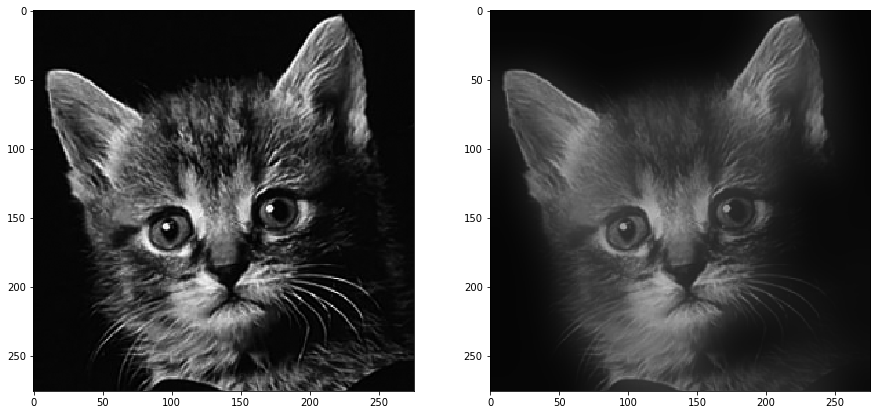

In [5]:
filteredfast = fastGuidedfilter(I_normed, I_normed, 8, 0.2 ** 2, 4)
# %timeit filteredfast = fastGuidedfilter(I_normed, I_normed, 8, 0.2 ** 2, 4)

compare(I, filteredfast)

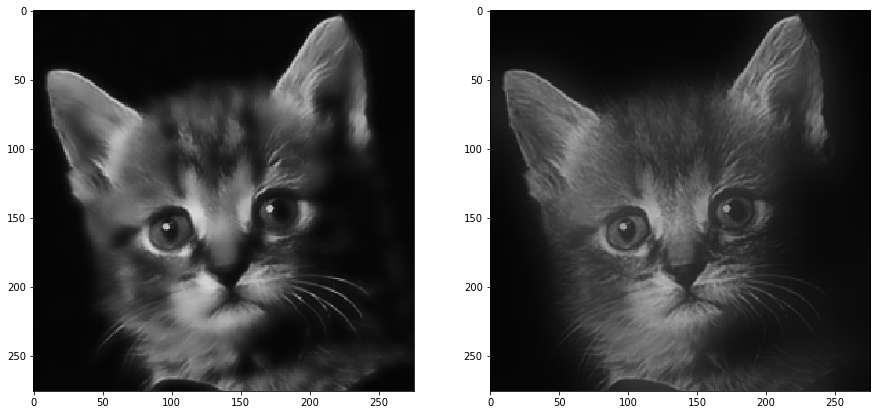

In [6]:
# compare fast / non-fast versions:
compare(filtered, filteredfast)

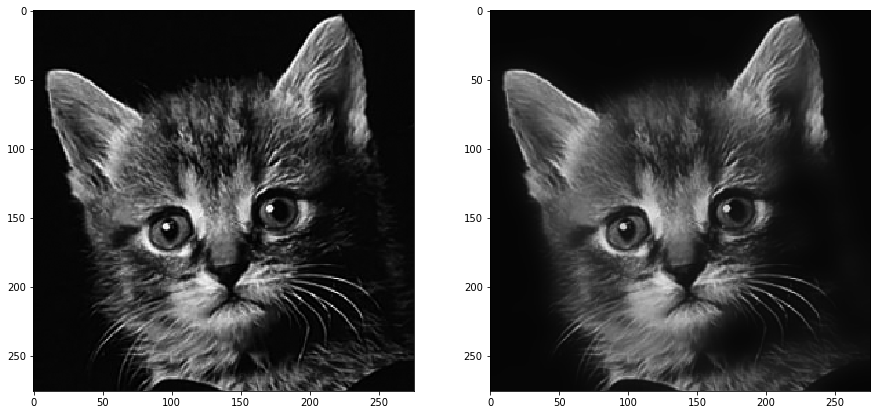

In [7]:
filteredcv2 = guidedFilter(I_normed, I_normed, 8, 0.2 ** 2)
# %timeit filteredcv2 = guidedFilter(I, I, 8, 0.2 ** 2)

compare(I, filteredcv2)

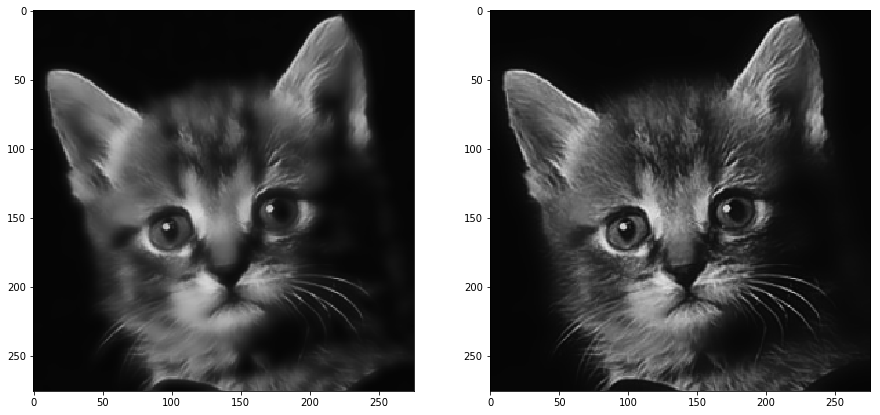

In [8]:
# compare our non-fast with cv2:
compare(filtered, filteredcv2)

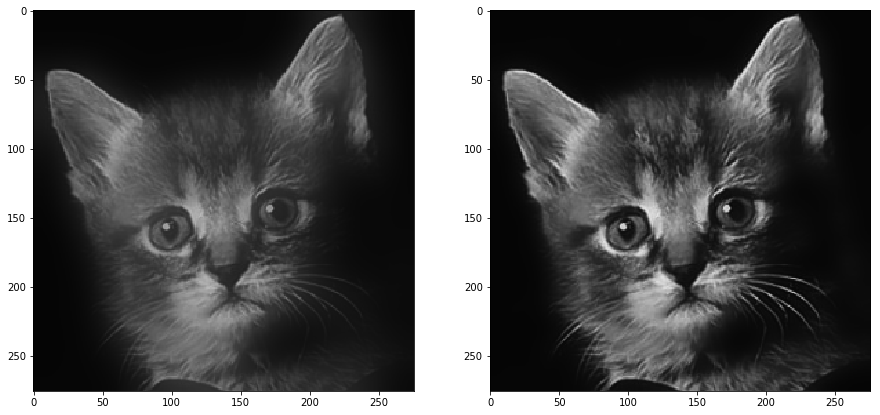

In [9]:
# compare our fast with cv2:
compare(filteredfast, filteredcv2)

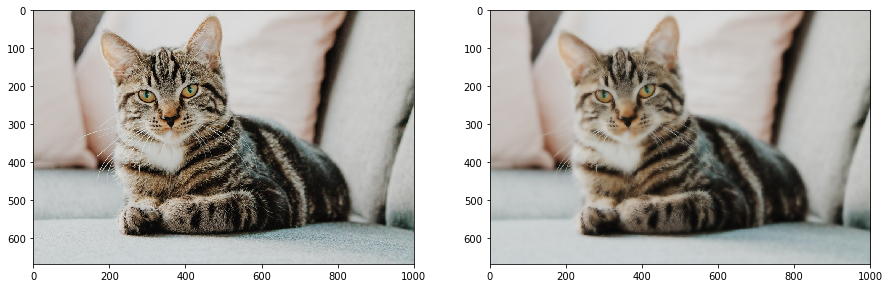

In [10]:
I2 = cv2.cvtColor(cv2.imread("../data/cat2.jpeg"), cv2.COLOR_BGR2RGB)
I2_normed = np.float32(I2 / 255)

filtered2 = Guidedfilter(I2_normed, I2_normed, 8, 0.2 ** 2)
# %timeit filtered2 = Guidedfilter(I2_normed, I2_normed, 8, 0.2 ** 2)

compare(I2, filtered2)

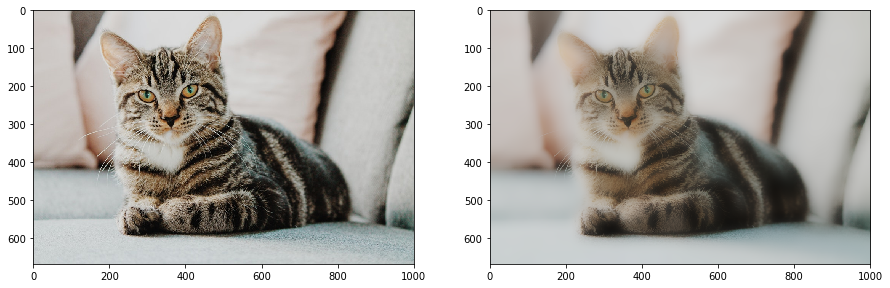

In [11]:
filteredfast2 = fastGuidedfilter(I2_normed, I2_normed, 8, 0.2 ** 2, 4)
# %timeit filteredfast2 = fastGuidedfilter(I2_normed, I2_normed, 8, 0.2 ** 2, 4)

compare(I2, filteredfast2)

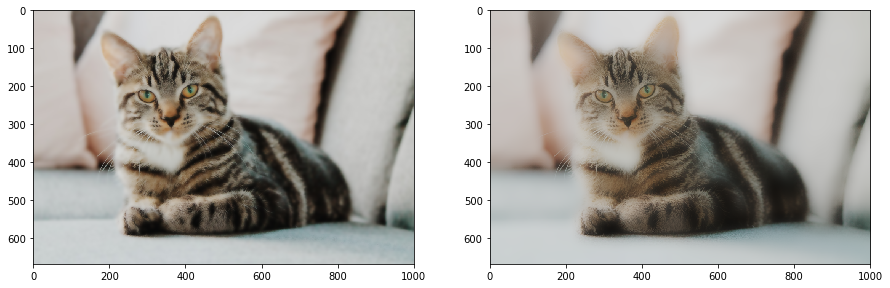

In [12]:
compare(filtered2, filteredfast2)

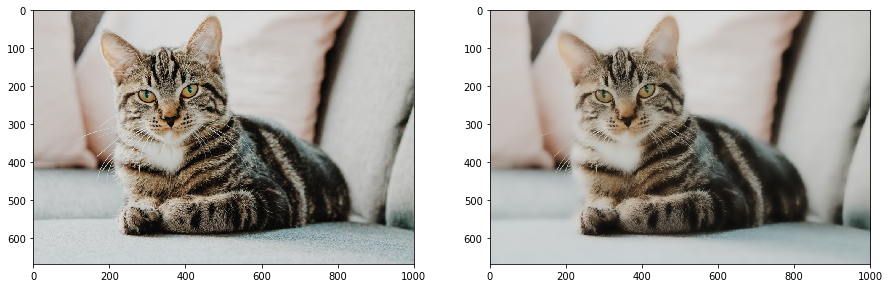

In [13]:
filteredcv2_bis = guidedFilter(I2_normed, I2_normed, 8, 0.2 ** 2)
# %timeit filteredcv2_bis = guidedFilter(I2, I2, 8, 0.2 ** 2)

compare(I2, filteredcv2_bis)

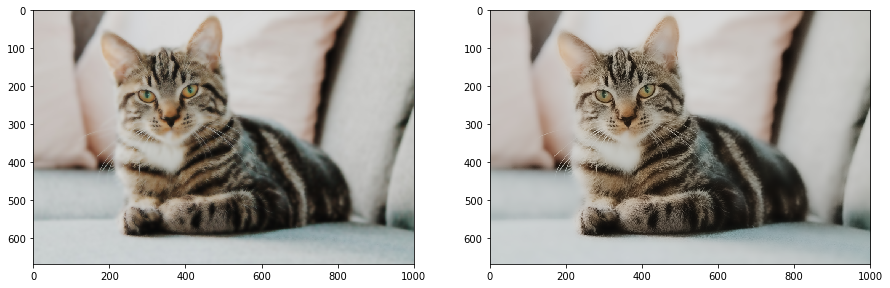

In [14]:
compare(filtered2, filteredcv2_bis)

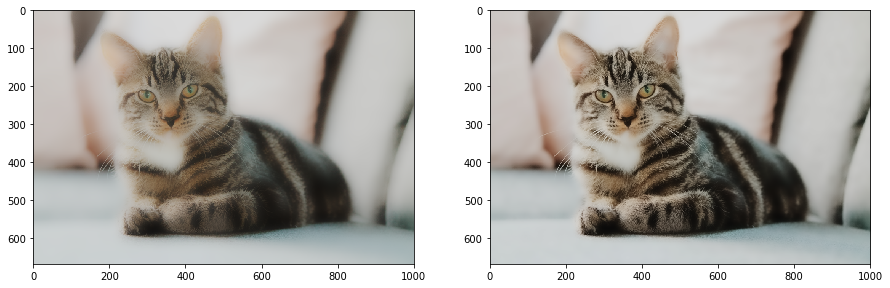

In [15]:
compare(filteredfast2, filteredcv2_bis)